# Simple Linear Regression
### We will use python scikit library to perform this task
#### We will use linear regression to predict the percentage of marks that a student is expected to score based upon the number of hours per day they studied. This simple linear regression task involves just two variables. 
##### We will use matplotlib for visualization

In [1]:
#importing libraries for making dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Now, we will read data from remote link
source = "http://bit.ly/w-data"
source_data = pd.read_csv(source)
print("Data imported from source")

source_data.head(15)

Data imported from source


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


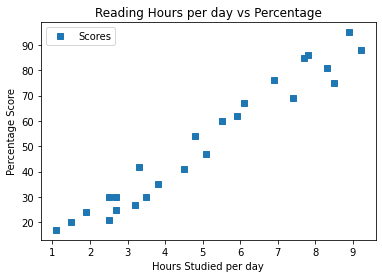

In [5]:
# Plotting the distribution of scores
source_data.plot(x='Hours', y='Scores', style='s')  
plt.title('Reading Hours per day vs Percentage')  
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Score')  
plt.show()

#### This dataset almost follows the linear regression 
### Now, we should work on preparation of data into training and testing

In [35]:
from sklearn.model_selection import train_test_split 
# requires train_test_split() method to split the dataset
X = source_data.iloc[:, :-1].values  
y = source_data.iloc[:, 1].values  
#Taking test size as 20% and train size as 80% with random distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=2) 

### Model Training
#### Now this is the best time to train the algorithm and then we visualize it too

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("We are successfully done with the training")

We are successfully done with the training


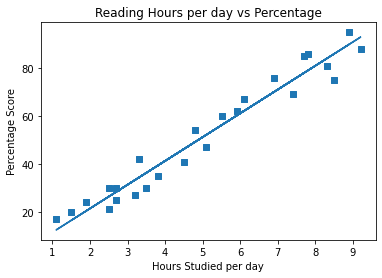

In [37]:
# Plotting the regression line
#The equation should be of the form: y = b1*x + b0
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, marker='s')#using the square marker
plt.plot(X, line);
plt.title('Reading Hours per day vs Percentage')  
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Score') 
plt.show()

#### This is the best time to make some predictions

In [38]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [45]:
#Not just 9.25, we can test for other values too
hours = 9.25
Predicted = regressor.coef_*hours +regressor.intercept_
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(Predicted))

No of Hours = 9.25
Predicted Score = [93.45860056]


In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.877039354964483
